In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pydot
import graphviz
from ipywidgets import interactive
from IPython.display import SVG,display, clear_output
from sklearn.tree import export_graphviz
import os

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

clear_output()

In [2]:
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../../')
DATA_FOLDER = os.path.join(ROOT, 'data/')
IMG_FOLDER = os.path.join(ROOT, 'img/')

In [3]:
colab = False

if colab:
    df = pd.read_pickle("/content/saeb_pb_2017-2007_fe_balanced.pkl")
else:
    df = pd.read_pickle(os.path.join(DATA_FOLDER, "saeb_pb_2017-2007_fe_balanced.pkl"))

df.head()

,id_aluno,faz_licao_casa_2.0,reprovacao_0.0,reprovacao_1.0,pai_sabe_ler_escrever_1.0,leitura_revista_comportamento_0.0,leitura_jornais_0.0,escolaridade_pai_4.0,mae_sabe_ler_escrever_1.0,leitura_internet_2.0,tempo_lazer_1.0,escolaridade_mae_4.0,gosta_estudar_disciplina_0.0,gosta_estudar_disciplina_1.0,desempenho_aluno_cat
38709,17486608,True,False,True,False,False,False,False,False,False,False,False,True,False,0
102980,11168544,True,False,True,False,False,False,False,True,False,True,False,False,True,0
55216,3272843,False,True,False,False,False,False,False,True,True,False,True,False,True,0
57311,12149602,False,False,True,False,False,False,False,True,True,False,True,True,False,0
38264,12094178,False,False,False,False,False,False,False,False,False,True,False,True,False,0


In [4]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno', 'proficiencia']

exclude = [col for col in df.columns if col in exclude]

In [5]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2698)

print("Tamanho treino: " + str(len(X_train)))
print("Tamanho teste: " + str(len(X_test)))

Tamanho treino: 938
Tamanho teste: 235


In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.0000
Eout: 0.1149
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       189
           1       0.72      0.67      0.70        46

    accuracy                           0.89       235
   macro avg       0.82      0.81      0.81       235
weighted avg       0.88      0.89      0.88       235



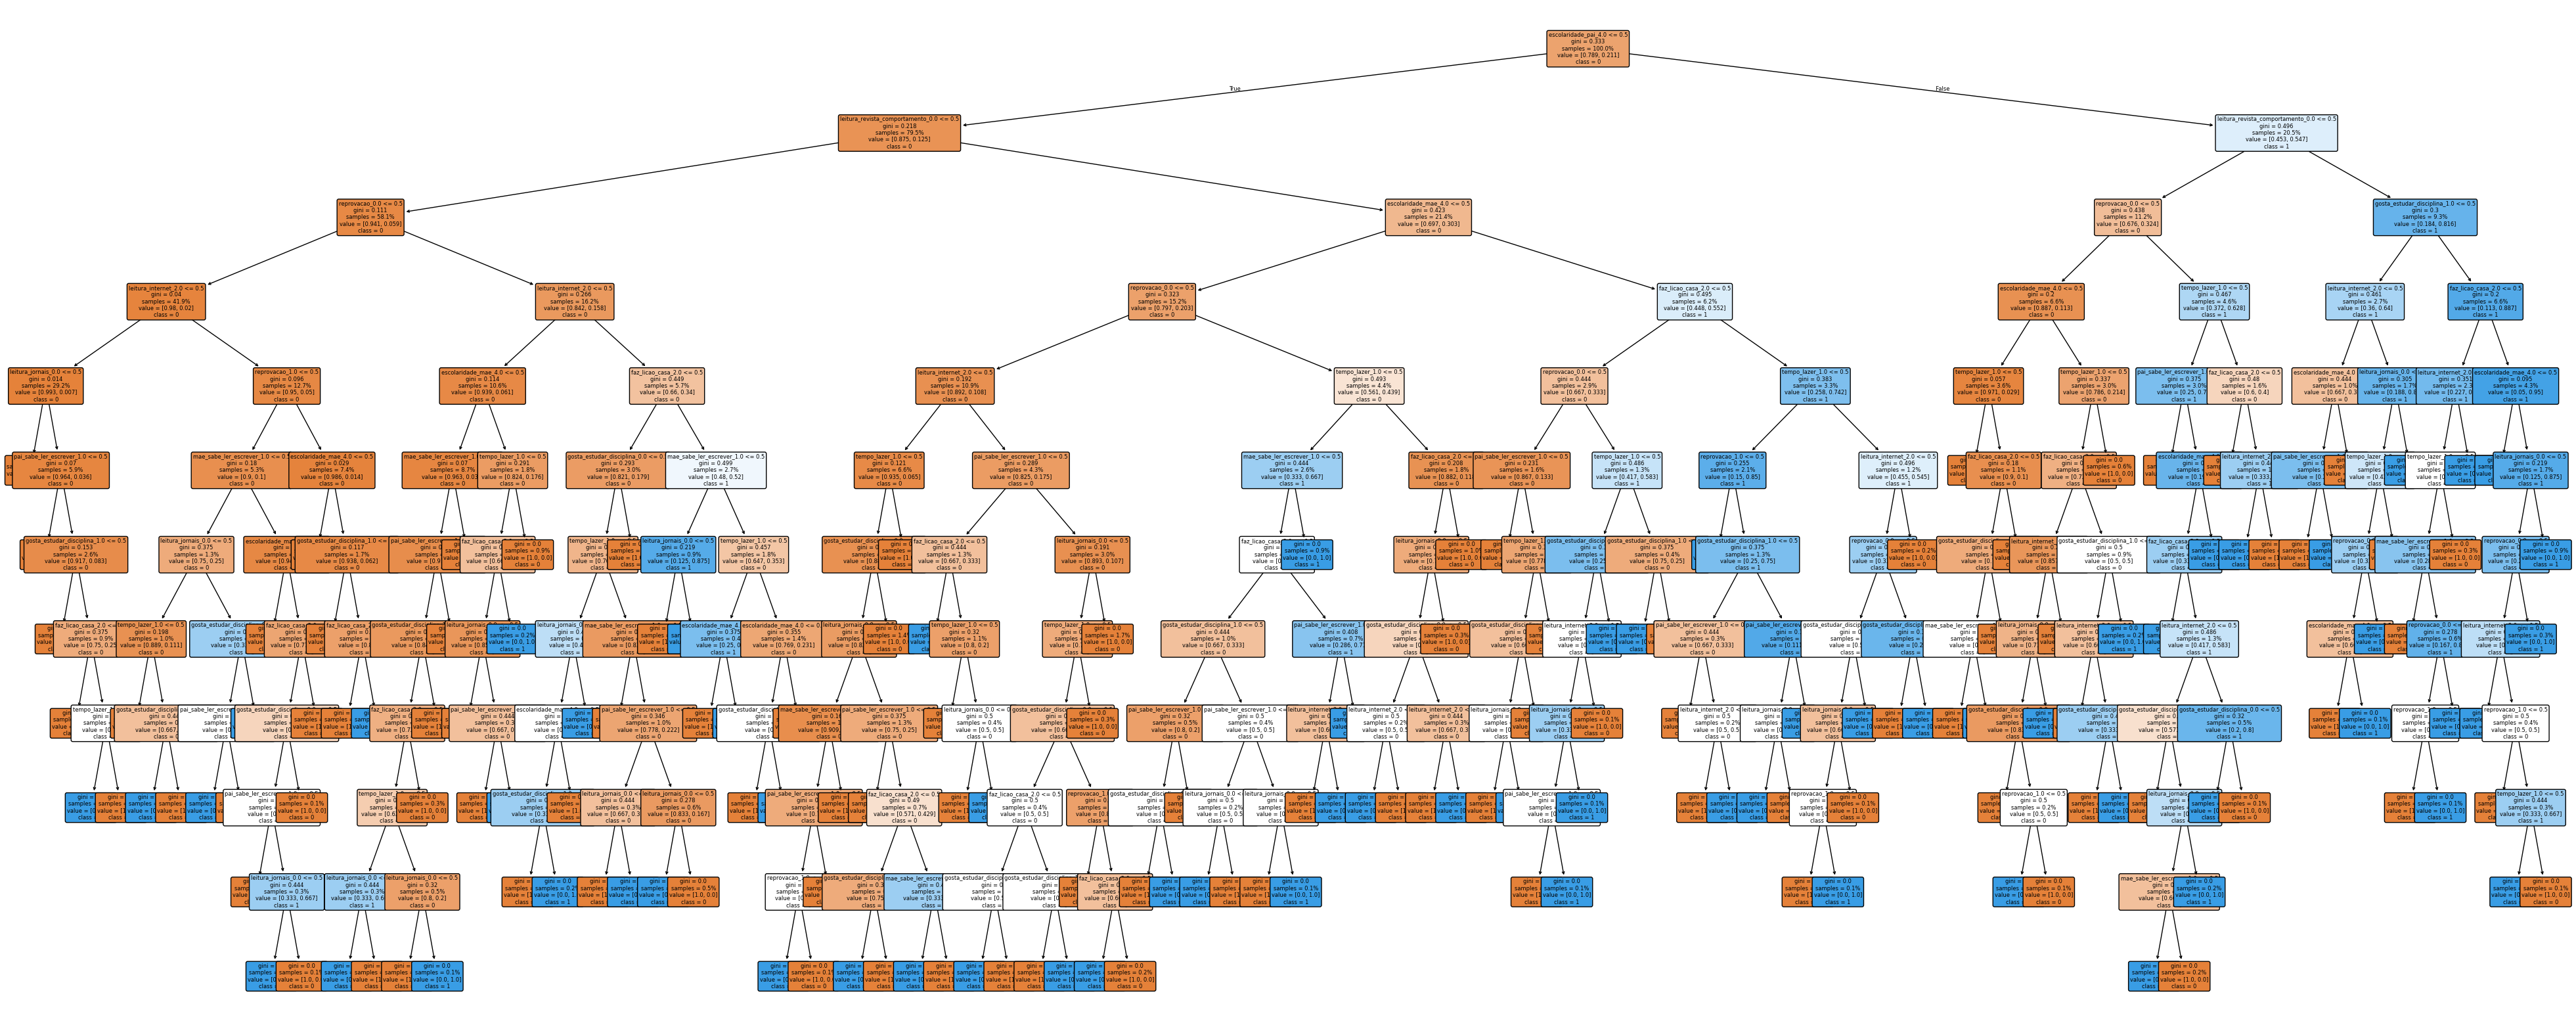

In [8]:
# feature labels
features_label = X.columns

# class label
class_label = ['0','1']

plt.figure(figsize=(50,20))
plot_tree(
    clf,
    feature_names = features_label,
    class_names = class_label,
    filled=True,
    proportion = True,
    fontsize=6,
    rounded = True)

if colab:
    plt.savefig('tree.png')
else:
    plt.savefig(os.path.join(IMG_FOLDER, 'tree.png'))

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

[0.         0.00051429 0.00065657 0.00074074 0.00075498 0.00081481
 0.00083333 0.0008547  0.00088889 0.00088889 0.00088889 0.00088889
 0.00092444 0.001      0.001      0.001      0.0010582  0.00106667
 0.00106667 0.00107654 0.00111111 0.00112139 0.00114286 0.00114286
 0.00115556 0.00117155 0.0012     0.00122222 0.00127273 0.00136219
 0.00137162 0.00155556 0.0015873  0.00171615 0.00174545 0.00177778
 0.00177778 0.00186667 0.00207407 0.00222222 0.00222222 0.0024
 0.00253968 0.00259617 0.00261818 0.0028134  0.0030582  0.00316825
 0.00350303 0.00355556 0.00399762 0.0044132  0.0052997  0.00559368
 0.00841785 0.0102168  0.01288092 0.01613514 0.01963346 0.05276103]
[0.         0.00257143 0.00519769 0.00741991 0.01270476 0.01514921
 0.01764921 0.02021331 0.02199109 0.02465775 0.02643553 0.02821331
 0.03283553 0.03483553 0.03683553 0.03883553 0.04201013 0.04414347
 0.0462768  0.04950643 0.05172865 0.05957841 0.06186413 0.06414984
 0.06877206 0.07814447 0.07934447 0.08178891 0.08942528 0.0921496

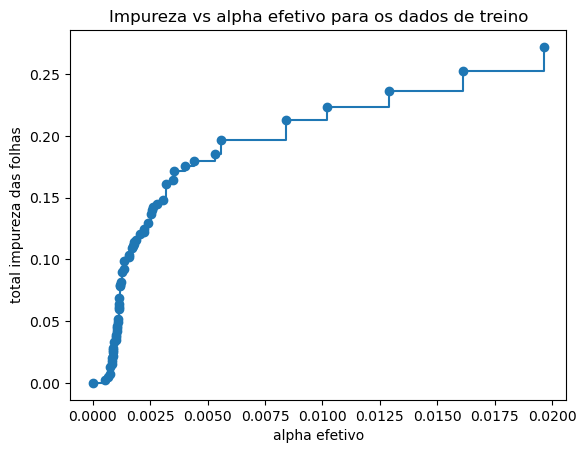

In [10]:
#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plota a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

print(ccp_alphas)
print(impurities)

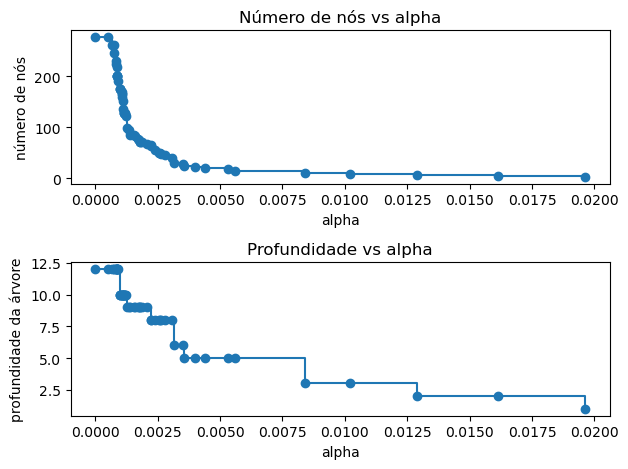

In [11]:
clfs = []
for ccp_alpha in ccp_alphas:
    if ccp_alpha >= 0:
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)

#Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
# cpp alphas descartando o ultimo nó e valores menores que 0
ccp_alphas = ccp_alphas[:-1]
ccp_alphas = [x for x in ccp_alphas if x >= 0]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

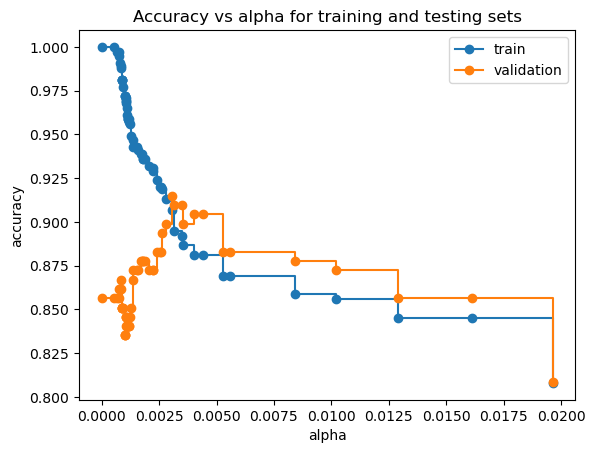

In [12]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [13]:
# identificando o alpha que resultou na melhor acurácia
best_alpha = ccp_alphas[np.argmax(val_scores)]
print("Melhor alpha: ", best_alpha)

Melhor alpha:  0.003058201058201057


Ein: 0.1034
Eout: 0.0979
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       182
           1       0.81      0.74      0.77        53

    accuracy                           0.90       235
   macro avg       0.87      0.84      0.85       235
weighted avg       0.90      0.90      0.90       235



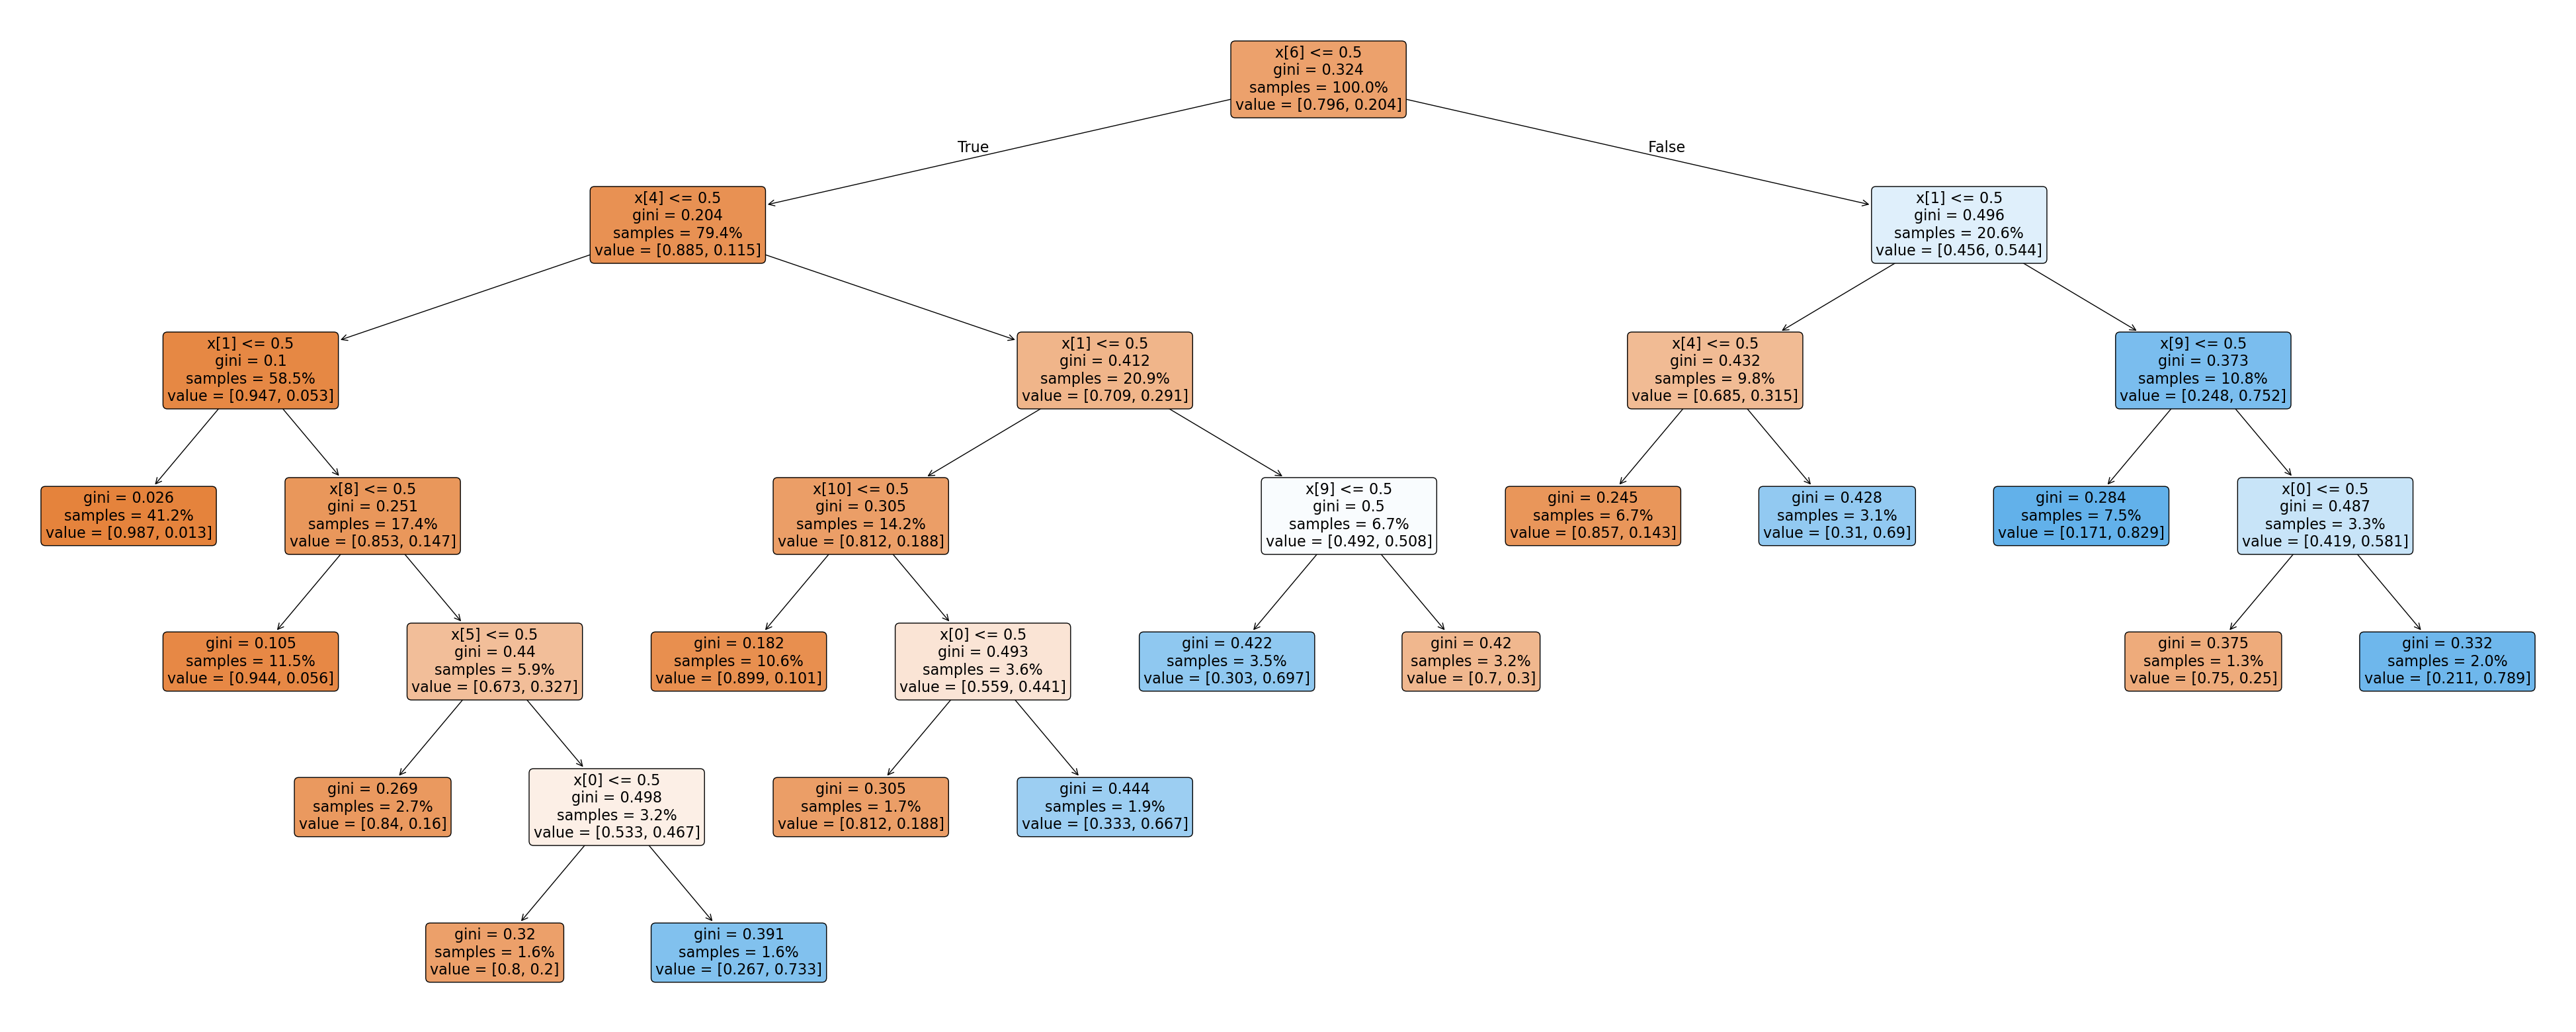

In [16]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True,
    proportion = True,
    fontsize=16,
    rounded = True)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)

param_grid = {'ccp_alpha': path.ccp_alphas}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10, verbose=2, n_jobs=-1)
CV_clf.fit(X_train, y_train)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_clf.predict(X_test))))
print(classification_report(y_test, CV_clf.predict(X_test)))

Fitting 10 folds for each of 66 candidates, totalling 660 fits


/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newe

[CV] END ......................................ccp_alpha=0.0; total time=   0.0s[CV] END ......................................ccp_alpha=0.0; total time=   0.0s

[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ...................ccp_alpha=0.00035414483791157246; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ...................ccp_alpha=0.00035414483791157246; total time=   0.0s
[CV] END ...................ccp_alpha=0.00035414483791157246; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ......................................ccp_alpha=0.0; total time=   0.0s
[CV] END ...................ccp_alpha=0.00035414483791157246; total time=   0.0s
[CV] END ...................